In [7]:
import itertools
import scipy
import numpy as np
import matplotlib.pyplot as plt

# Excursus: Exchangability
<div align="justify">

The concept of *exchangability* can be seen as a relaxation of the typical *i.i.d* (independently and identically distributed) assumption. Informally is means that the ordering of the random variables in the sequence is irrelevant for the joint probability. \
More formally, a finite sequence of random variables $X_1, \dots, X_N$ is **exchangeable**, if 
$$
    P(X_1 = x_1, X_2 = x_2, \dots, X_N = x_N) = P(X_{\sigma(1)} = x_1, X_{\sigma(2)} = x_2, \dots, X_{\sigma(N)} = x_N)
$$

for every permutation  $\sigma : [N] \rightarrow [N]$.
For an example we think of an urn with three red and two blue balls. 
We seek to draw all five from the urn **without** replacement. 
Pouring the example into a probabilistic framework the i-th drawn ball is denoted by a random variable $X_i = 1$ if the ball is red and $X_i = 0$ otherwise.
We now are interested in the probability of any sequence $X_1 = x_1, \dots, X_5 = x_5$.

</div>

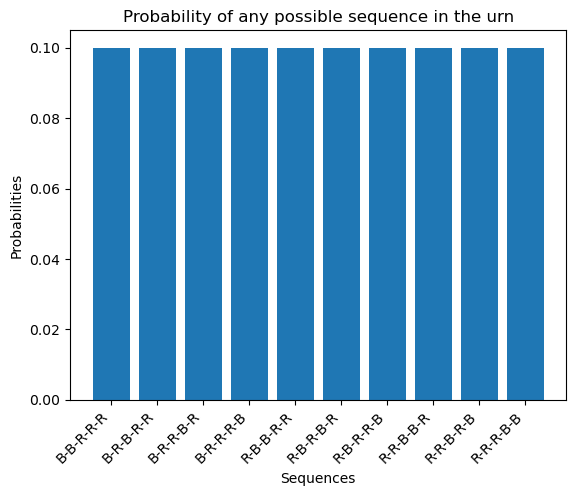

In [8]:
urn = ['R','R','R','B','B']
def get_all_sequences(urn):
    a = np.array(list(map(lambda x: ' '.join(x),itertools.permutations(urn,len(urn)))))
    b = np.unique(a)
    return list(map(lambda x: x.split(' '), b))

def calculate_probability_sequence(urn, sequence):
    tmp = urn.copy()
    probability = 1
    for elem in sequence:
        probability *= tmp.count(elem) / len(tmp)
        tmp.remove(elem)
    return probability

def visualize_all_probabilities(urn):
    sequences, probabilites= list(zip(
            *[('-'.join(sequence), calculate_probability_sequence(urn, sequence))
                for sequence in get_all_sequences(urn)]
        ))
    fig,ax = plt.subplots()
    
    ax.bar(x=sequences, height=probabilites)
    
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    ax.set_xlabel("Sequences")
    ax.set_ylabel("Probabilities")
    ax.set_title("Probability of any possible sequence in the urn")
    
    plt.show()

visualize_all_probabilities(urn)

In [9]:
##### Jupyter Book auxiliary########
from myst_nb import glue
probability_each_sequence_independency = round(scipy.stats.binom(len(urn),urn.count(urn[0])/len(urn)).pmf(urn.count(urn[0])), 3)
glue("independent_prob", probability_each_sequence_independency, display=False)
###################################


<div align="justify">

While it is not surprising that each sequence has equal probability it shows us that this sequence fulfills the property of *exchangeability*.
Also the individual random variables are not independent, as the $i$-th realisation drawn ball influences the probability of the next $(i+1)$-th realisation. 
If the random variables were independent (resulting in a binomial distribution), the $P(X_1,\dots, X_5) =$ {glue:}`independent_prob`.

</div>